In [112]:
import pandas as pd
#from pandas_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt # Visualización

pd.set_option('display.max_columns', None)
import seaborn as sns
from seaborn import boxplot
from numpy import array

# Gráficos
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
# Preprocesado y modelado
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
#import statsmodels.api as sm
#import statsmodels.formula.api as smf
# Configuración warnings
import warnings
warnings.filterwarnings('ignore')
#pd.set_option("display.max_columns",None)
import math as mat
# Configuración matplotlib
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')
import datetime as dt
import missingno as msno
%matplotlib inline

In [113]:
test= pd.read_csv('/content/test.csv',sep=';')

In [114]:
train= pd.read_csv('/content/train.csv',sep=';')

In [115]:
test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [116]:
test.shape

(4521, 17)

In [117]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [58]:
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [59]:
train.shape

(45211, 17)

In [60]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB




*   TEST TIENE : (4521, 17)= 17 COLUMNAS ; 4521 FILAS
*   TRAIN TIENE : (45211, 17)= 17 COLUMNAS; 45211 FILAS

EL ESTANDAR DE LA INDUSTRIA ES DE 70- 80 TRAIN ;30 - 20 TEST .EStos dataset  NO ESTAN BAJO EL ESTANDAR DE LA INDUSTRIA







In [118]:
#unir las tablas train y test
df = pd.concat([train,test], axis=0)

Target : 'default'

In [119]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [120]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 49732 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        49732 non-null  int64 
 1   job        49732 non-null  object
 2   marital    49732 non-null  object
 3   education  49732 non-null  object
 4   default    49732 non-null  object
 5   balance    49732 non-null  int64 
 6   housing    49732 non-null  object
 7   loan       49732 non-null  object
 8   contact    49732 non-null  object
 9   day        49732 non-null  int64 
 10  month      49732 non-null  object
 11  duration   49732 non-null  int64 
 12  campaign   49732 non-null  int64 
 13  pdays      49732 non-null  int64 
 14  previous   49732 non-null  int64 
 15  poutcome   49732 non-null  object
 16  y          49732 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.8+ MB


In [121]:
df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.096564,-0.009880,-0.004399,0.003877,-0.022419,0.000928
balance,0.096564,1.000000,0.003348,0.018195,-0.014147,0.003968,0.017243
day,-0.009880,0.003348,1.000000,-0.029674,0.162336,-0.093166,-0.052083
duration,-0.004399,0.018195,-0.029674,1.000000,-0.083061,-0.000478,0.002330
campaign,0.003877,-0.014147,0.162336,-0.083061,1.000000,-0.089042,-0.035162
pdays,-0.022419,0.003968,-0.093166,-0.000478,-0.089042,1.000000,0.461822
previous,0.000928,0.017243,-0.052083,0.002330,-0.035162,0.461822,1.000000


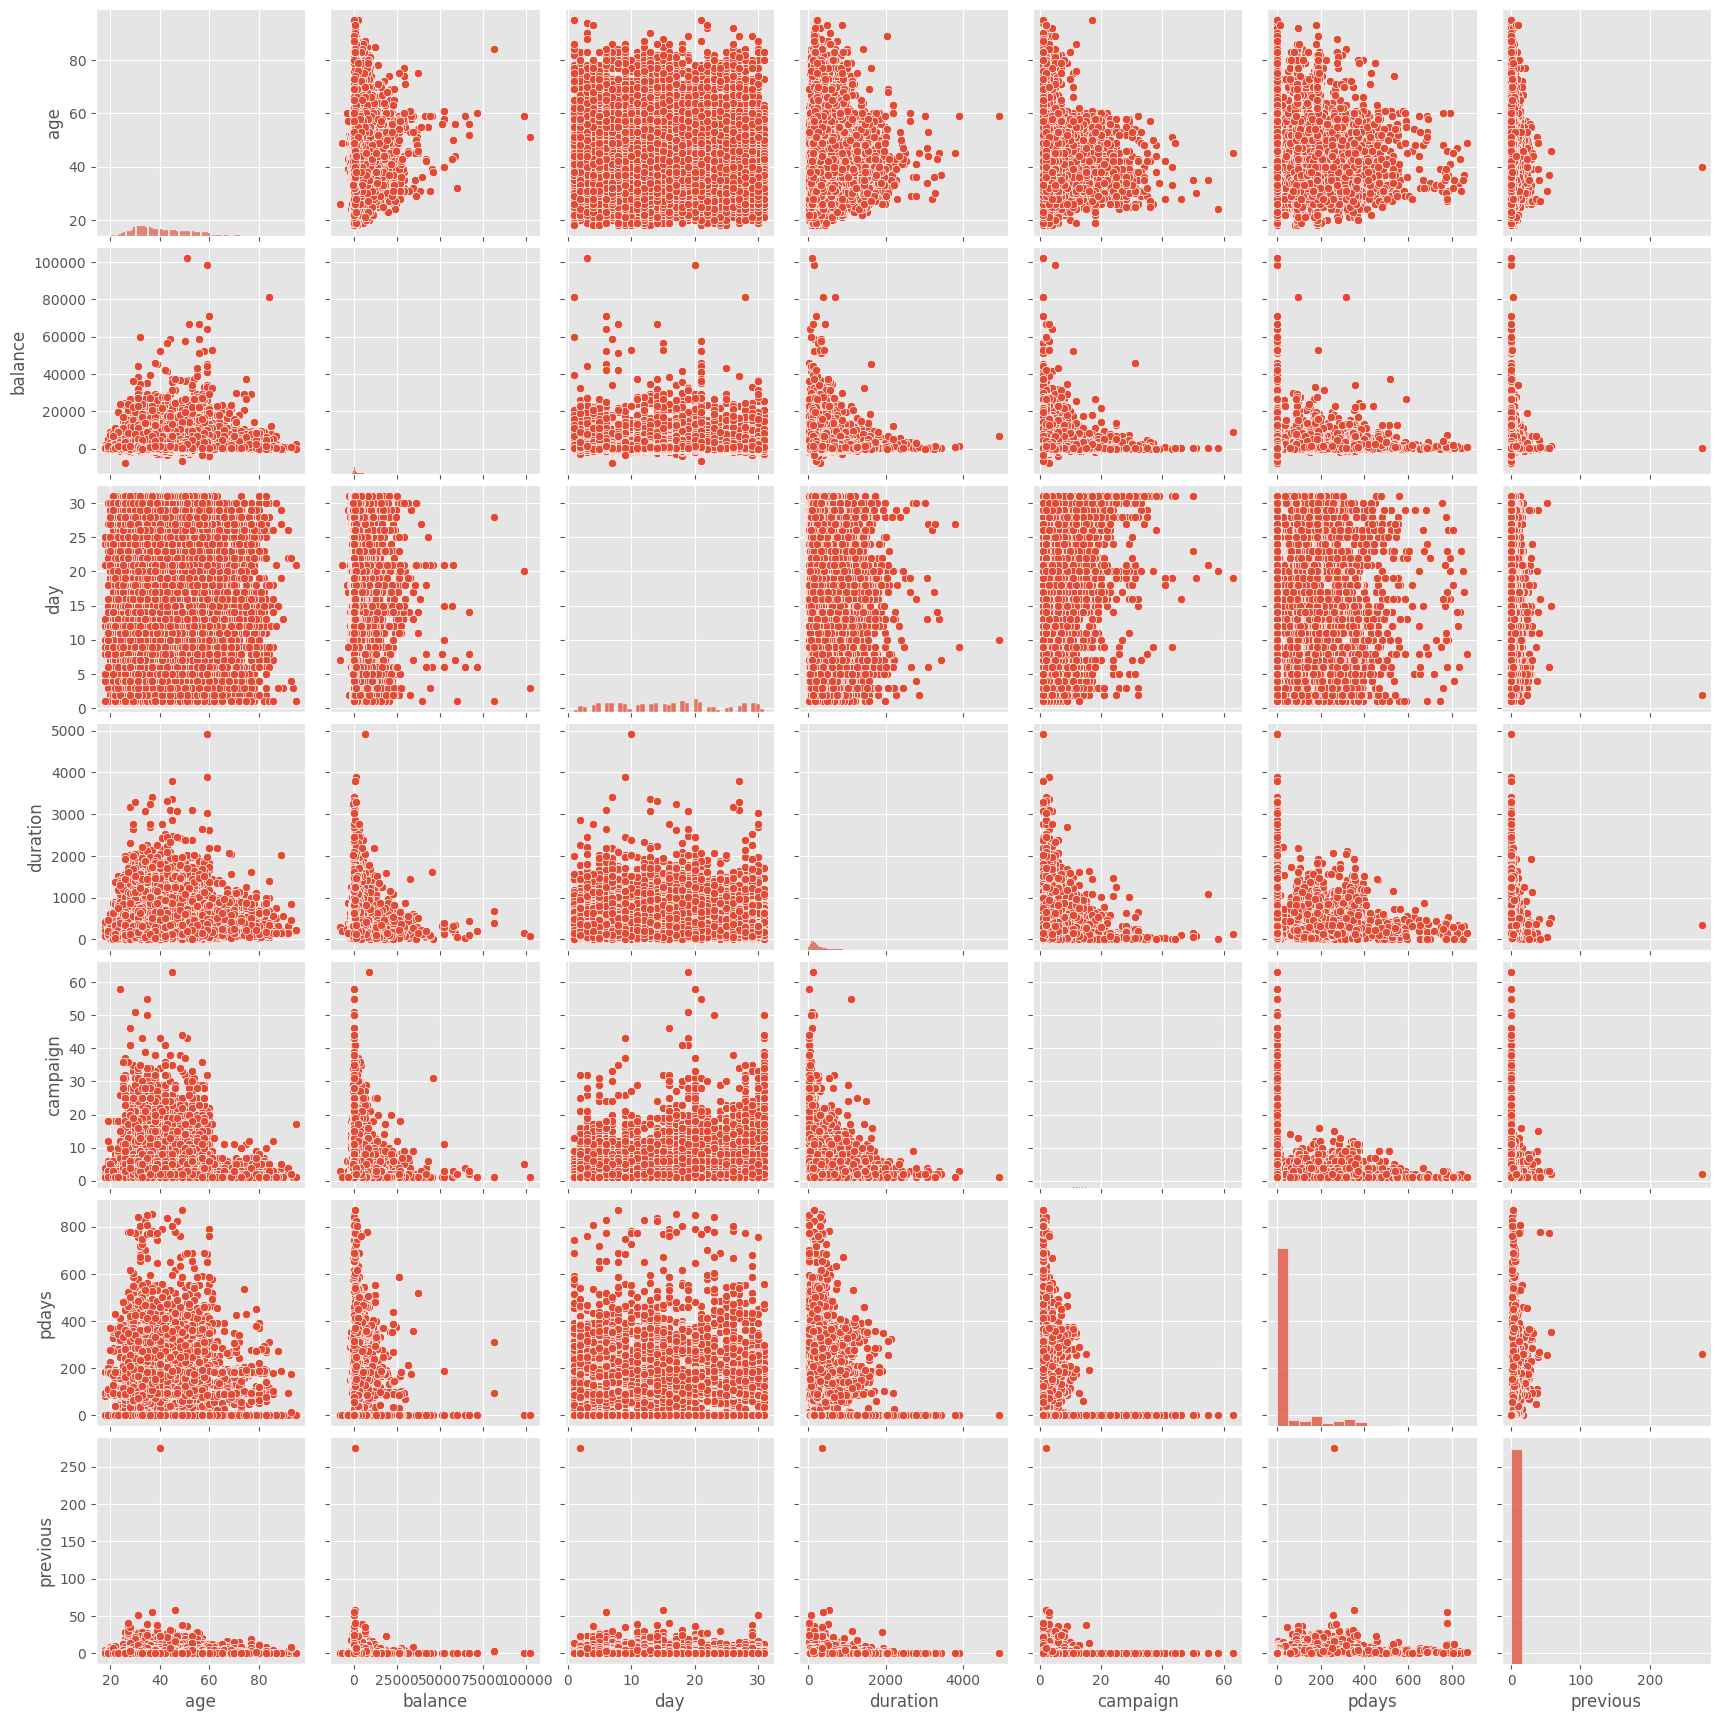

In [122]:
sns.pairplot(df)

Visualizamos las relaciones  de las variables .Se puede determinar las variables se ven sucias con datos dispersos.

In [42]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000
mean,40.957472,1367.761562,15.816315,258.690179,2.766549,40.158630,0.576892
std,10.615008,3041.608766,8.315680,257.743149,3.099075,100.127123,2.254838
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.000000,21.000000,320.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


## Analisis Descriptivo: saldo en la cuenta (balance ), nivel educacional(education), estado civil(marital), vivienda(housing) y trabajo(job).

variable: balance


*   Percentil 25 :  el 25 % de los cliente tiene  total maximo de valor  de  720 y menos que ese valor.
*   Elemento de lista



In [26]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

En el dataset no hay null, nan

## Se eliminan variables que no nos sirven para el estudio .

In [126]:
df1=df.drop(['age', 'loan', 'contact', 'day','month','duration','campaign', 'pdays', 'previous', 'poutcome','y'], axis=1)

In [124]:
df1.shape

(49732, 6)

Al eliminar 11 variables  el dataset queda con 49732 filas y 6 columnas .

## El Df1 tiene solo  las columnas que se utilizaran

In [127]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49732 entries, 0 to 4520
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   job        49732 non-null  object
 1   marital    49732 non-null  object
 2   education  49732 non-null  object
 3   default    49732 non-null  object
 4   balance    49732 non-null  int64 
 5   housing    49732 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.7+ MB


In [129]:
df1['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [128]:
#convertir a variable  'job' numericas Se asigna el valor 1 si se observa y 0 en caso contrario.
df1['management']= df['job'].replace(['management', 'technician', 'entrepreneur', 'blue-collar','unknown', 'retired', 'admin.', 'services', 'self-employed','unemployed', 'housemaid', 'student'],[0,0,0,0,0,0,0,0,0,0,0,1])
df1['management']= df['job'].replace(['management', 'technician', 'entrepreneur', 'blue-collar','unknown', 'retired', 'admin.', 'services', 'self-employed','unemployed', 'housemaid', 'student'],[0,0,0,0,0,0,0,0,0,0,0,1])
df1['management']= df['job'].replace(['management', 'technician', 'entrepreneur', 'blue-collar','unknown', 'retired', 'admin.', 'services', 'self-employed','unemployed', 'housemaid', 'student'],[0,0,0,0,0,0,0,0,0,0,0,1])

df1.head()

,job,marital,education,default,balance,housing,management
0,management,married,tertiary,no,2143,yes,0
1,technician,single,secondary,no,29,yes,0
2,entrepreneur,married,secondary,no,2,yes,0
3,blue-collar,married,unknown,no,1506,yes,0
4,unknown,single,unknown,no,1,no,0


In [130]:
df1['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [131]:
df1['default'].unique()

array(['no', 'yes'], dtype=object)

In [132]:
#convertir a variable  'MARITAL' numericas Se asigna el valor 1 si se observa y 0 en caso contrario.
df1['married']= df['marital'].replace(['married', 'single', 'divorced'],[0,0,1])
df1['single']= df['marital'].replace(['married', 'single', 'divorced'],[0,1,0])
df1['divorced']= df['marital'].replace(['married', 'single', 'divorced'],[1,0,0])

df1.head()

,job,marital,education,default,balance,housing,management,married,single,divorced
0,management,married,tertiary,no,2143,yes,0,0,0,1
1,technician,single,secondary,no,29,yes,0,0,1,0
2,entrepreneur,married,secondary,no,2,yes,0,0,0,1
3,blue-collar,married,unknown,no,1506,yes,0,0,0,1
4,unknown,single,unknown,no,1,no,0,0,1,0


In [133]:
df1.columns

Index(['job', 'marital', 'education', 'default', 'balance', 'housing',
       'management', 'married', 'single', 'divorced'],
      dtype='object')

## TARGET : VARIABLE CLASIFICATORIA : 'default'

In [ ]:
#df1['no']= df['default'].replace(['no', 'yes'],[1,0])#codificación binaria directa
#df1['yes']= df['default'].replace(['no', 'yes'],[0,1])
#df1.head()

## Vemos el desbalanceo

la variable target 'default' esta desbalanceada

In [134]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49732 entries, 0 to 4520
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   job         49732 non-null  object
 1   marital     49732 non-null  object
 2   education   49732 non-null  object
 3   default     49732 non-null  object
 4   balance     49732 non-null  int64 
 5   housing     49732 non-null  object
 6   management  49732 non-null  int64 
 7   married     49732 non-null  int64 
 8   single      49732 non-null  int64 
 9   divorced    49732 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 4.2+ MB


In [141]:
df1['default'] = df1['default'].map({True: 1, False: 0})

Creamos el DATASET

In [ ]:
y = df1['default']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [ ]:
LABELS = ['False', 'True']

In [ ]:
def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(2, 2))
    sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('Verdadero default')
    plt.xlabel('Predicted default')
    plt.show()
    print (classification_report(y_test, pred_y))

In [ ]:
## REgresion logistica

In [ ]:
# Crea una instancia del modelo de regresión logística
logreg_model = LogisticRegression()

# Entrena el modelo utilizando los datos de entrenamiento
logreg_model.fit(X_train, y_train)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Supongamos que tienes un DataFrame 'X' con las características y un arreglo 'y' con las etiquetas

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Crear un pipeline que incluya PCA y regresión logística
pipeline = Pipeline([
    ('pca', PCA(n_components=2)),
    ('logistic', LogisticRegression())
])

# Ajustar el modelo en los datos de entrenamiento
pipeline.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
predictions = pipeline.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = pipeline.score(X_test, y_test)
print(accuracy)